In [1]:
from skimage.external import tifffile
from skimage.filters import sobel, median
from scipy.signal import convolve2d
import matplotlib.pyplot as plt
import numpy as np
import skimage
import pdb

# Orignal image

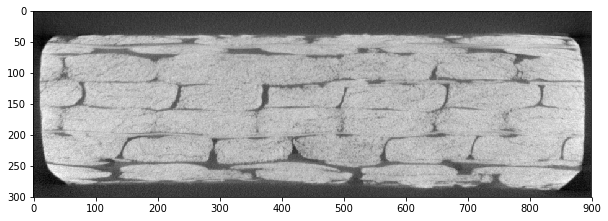

In [2]:
img = tifffile.imread("../test_image.tif")
%matplotlib inline
plt.figure(figsize=(10, 10))
plt.imshow(img, cmap=plt.get_cmap('gray'))

# Median filter and mean filter

There are pepper and salt noises in the image. One possible way to remove those noises is using <span style="color:blue">**median filter**</span>. Median filtering is a nonlinear signal processing technique that is useful for noise suppresion in images. In one-dimensional scenario, the median filter consists of a sliding window. The center pixel in the window is replaced by the median value of pixels in the window. 

For example, if the pixels within the window is [0.1, 0.2, 0.9, 0.4, 0.5], the center pixel would be replaced by the value 0.4. In this example, if 0.9 were a noise spike (**salt noise**), it would be eliminated. For the same reason, if we encoutered an image with **pepper noise**, it can be elimiated by median filter.  

On the other hand, instead of takign the median value, <span style="color:red">**mean filter**</span> replaces the center pixel by the mean of pixels within the window. Applying mean filter is an another way to elimiate pepper and salt noises. The figure below demonstrates the operation of mean and median filter.

![](./Figures/1-median_and_mean_filter.png)

In [3]:
def meanFiltering(im, filter_size=(2, 2)):
    mean_filter = np.ones(filter_size, dtype=np.uint16)/(filter_size[0]*filter_size[1])
    img = convolve2d(im, mean_filter, mode="same")
    img = img.astype(np.float32)/65535
    return img

D:\Tsou\Anaconda\lib\site-packages\skimage\filters\rank\generic.py:102: UserWarning: Bitdepth of 15 may result in bad rank filter performance due to large number of bins.
  "performance due to large number of bins." % bitdepth)


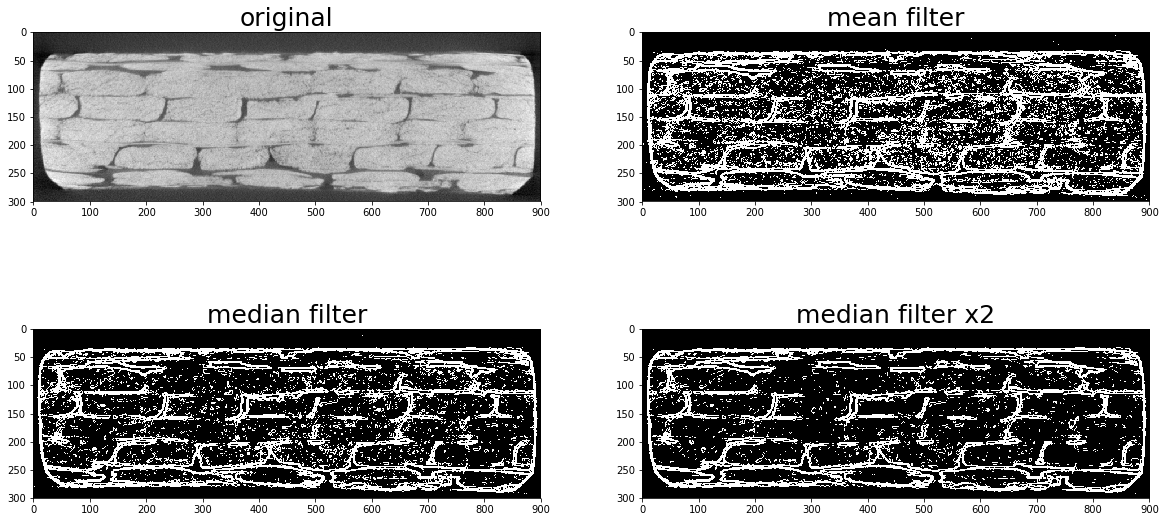

In [4]:
img_median1 = median(img)
img_median2 = median(img_median1)
img_median1_sobel = sobel(img_median1)>0.02
img_median2_sobel = sobel(img_median2)>0.02
img_mean = meanFiltering(img)
img_mean_sobel = sobel(img_mean)>0.02

%matplotlib inline
f, ax = plt.subplots(2, 2, figsize=(20, 10))
ax[0, 0].set_title("original", size=25)
ax[0, 0].imshow(img, cmap='gray')
ax[0, 1].set_title("mean filter", size=25)
ax[0, 1].imshow(img_mean_sobel, cmap='gray')
ax[1, 0].set_title("median filter", size=25)
ax[1, 0].imshow(img_median1_sobel, cmap='gray')
ax[1, 1].set_title("median filter x2", size=25)
ax[1, 1].imshow(img_median2_sobel, cmap='gray')